## Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Loading the dataset from uci ml repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets    #hi 

### Metadata

In [20]:
# metadata
print(adult.metadata)
feature_names = X.columns
print(feature_names)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### Get numerical and categorical columns

In [ ]:
numerical = list(X.select_dtypes(include='number').columns)
categorial = list(set(X.columns[1:])-set(numerical))
numerical, categorial

(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
 ['relationship',
  'sex',
  'marital-status',
  'education',
  'native-country',
  'occupation',
  'race',
  'workclass'])

### Convert categorical columns to categorical

In [22]:
for column in categorial:
    print(column)
    X[column]= X[column].astype('category')

relationship
sex
marital-status
education
native-country
occupation
race
workclass


/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [33]:
X.select_dtypes(include='category').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [31]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
y['income']=y['income'].apply(lambda s : s.replace('.', ''))
y['income']=y['income'].astype('category')
y['income']=y['income'].cat.codes

/tmp/ipykernel_7885/2481787065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].apply(lambda s : s.replace('.', ''))
/tmp/ipykernel_7885/2481787065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].astype('category')
/tmp/ipykernel_7885/2481787065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [65]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


## Data splits

In [66]:
seed=42

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## SOTA(?) Methods

In [68]:
import xgboost as xgb

In [71]:
xgb_model = xgb.XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
xgb_model.predict_proba(X_test)[:,1].shape

(9769,)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

def eval(model):
    pred = model.predict(X_test)
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, pred)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    metrics['f1'] = f1_score(y_test, pred)

    metrics['roc_curve'] = RocCurveDisplay.from_estimator(model, X_test, y_test)
    metrics['prc'] = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

    return metrics

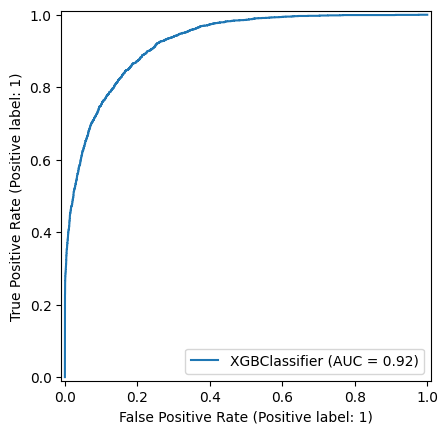

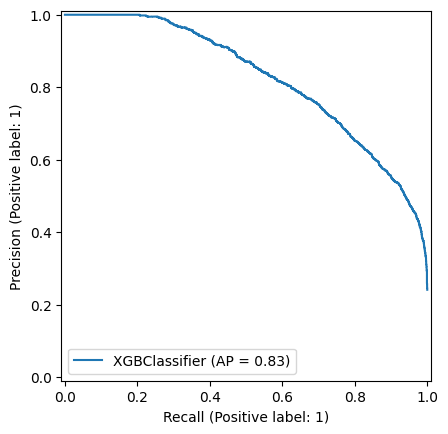

In [111]:
metrics=eval(xgb_model)

In [115]:
metrics

{'accuracy': 0.8722489507626164,
 'precision': 0.7808219178082192,
 'recall': 0.6535031847133758,
 'f1': 0.7115117891816921,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x7e92d10f45f0>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x7e92d069fbf0>}

In [116]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

/home/xing/miniconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xing/miniconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077


LGBMClassifier()

{'accuracy': 0.8731702323676938,
 'precision': 0.7870370370370371,
 'recall': 0.6496815286624203,
 'f1': 0.7117934403349616,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x7e92d0c76d20>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x7e92ddc0a2d0>}

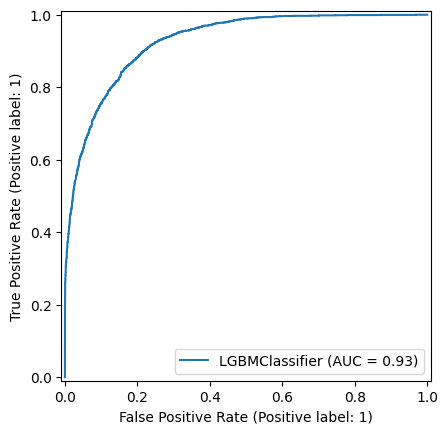

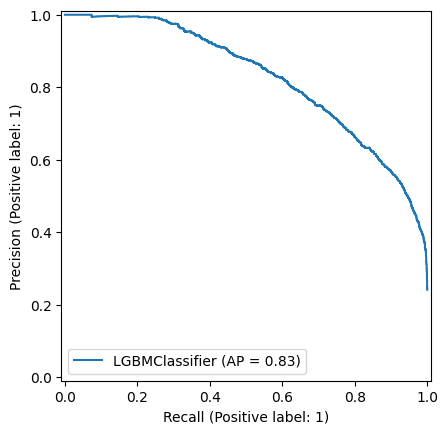

In [118]:
metrics=eval(lgbm_model)
metrics

### Standardize numerical features

I'll need to do this for neural methods.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical]=scaler.fit_transform(X_train[numerical])
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
37193,32,Private,-1.315975,HS-grad,-0.420108,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
31093,45,State-gov,-0.431457,Masters,1.529031,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
33814,35,Local-gov,0.587895,12th,-0.809935,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
14500,64,Private,-1.138576,HS-grad,-0.420108,Divorced,Craft-repair,Unmarried,White,Male,-0.145524,-0.216668,-1.646086,United-States
23399,63,Self-emp-not-inc,-1.525211,HS-grad,-0.420108,Widowed,Sales,Not-in-family,White,Male,-0.145524,-0.216668,2.388283,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,Private,0.095541,Bachelors,1.139203,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,-0.145524,4.467901,0.774535,?
44732,21,Private,-0.936616,HS-grad,-0.420108,Never-married,Machine-op-inspct,Own-child,White,Female,-0.145524,-0.216668,-0.032339,United-States
38158,23,Private,1.701503,HS-grad,-0.420108,Divorced,Adm-clerical,Not-in-family,White,Female,-0.145524,-0.216668,-0.032339,United-States
860,18,Private,0.248322,11th,-1.199763,Never-married,Adm-clerical,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States


In [123]:
X_test[numerical] = scaler.transform(X_test[numerical])
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,18,Private,2.202051,HS-grad,-0.420108,Never-married,Other-service,Not-in-family,White,Male,-0.145524,-0.216668,-1.646086,United-States
23881,17,Private,-0.104463,12th,-0.809935,Never-married,Sales,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States
30507,25,Local-gov,1.502379,HS-grad,-0.420108,Never-married,Handlers-cleaners,Other-relative,Black,Male,-0.145524,-0.216668,-0.032339,United-States
28911,20,Private,0.266570,Some-college,-0.030280,Never-married,Sales,Own-child,White,Female,-0.145524,-0.216668,-0.839212,United-States
19484,47,Private,0.510479,HS-grad,-0.420108,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,-0.145524,-0.216668,1.258660,Puerto-Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,56,Self-emp-not-inc,-0.674677,Masters,1.529031,Separated,Sales,Unmarried,White,Female,-0.145524,-0.216668,-0.355088,United-States
18798,21,Private,0.149605,HS-grad,-0.420108,Never-married,Other-service,Own-child,White,Male,-0.145524,-0.216668,-0.274401,United-States
29519,38,Private,0.040607,Some-college,-0.030280,Divorced,Transport-moving,Not-in-family,Black,Male,-0.145524,-0.216668,1.177972,United-States
550,46,Self-emp-not-inc,0.526535,Some-college,-0.030280,Divorced,Exec-managerial,Not-in-family,White,Male,-0.145524,-0.216668,0.774535,United-States


In [124]:
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

data_config = DataConfig(
    target=[
        'income'
    ],  
    continuous_cols=numerical,
    categorical_cols=categorial,
)
trainer_config = TrainerConfig(
)
optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="classification",
)

In [128]:
from pytorch_tabular import TabularModel
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

2025-03-14 17:56:36,596 - {pytorch_tabular.tabular_model:146} - INFO -          
Experiment Tracking is turned off                                               


In [138]:
train=X_train.join(y_train)
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
37193,32,Private,-1.315975,HS-grad,-0.420108,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,0
31093,45,State-gov,-0.431457,Masters,1.529031,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,1
33814,35,Local-gov,0.587895,12th,-0.809935,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,0
14500,64,Private,-1.138576,HS-grad,-0.420108,Divorced,Craft-repair,Unmarried,White,Male,-0.145524,-0.216668,-1.646086,United-States,0
23399,63,Self-emp-not-inc,-1.525211,HS-grad,-0.420108,Widowed,Sales,Not-in-family,White,Male,-0.145524,-0.216668,2.388283,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,Private,0.095541,Bachelors,1.139203,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,-0.145524,4.467901,0.774535,?,1
44732,21,Private,-0.936616,HS-grad,-0.420108,Never-married,Machine-op-inspct,Own-child,White,Female,-0.145524,-0.216668,-0.032339,United-States,0
38158,23,Private,1.701503,HS-grad,-0.420108,Divorced,Adm-clerical,Not-in-family,White,Female,-0.145524,-0.216668,-0.032339,United-States,0
860,18,Private,0.248322,11th,-1.199763,Never-married,Adm-clerical,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States,0


In [139]:
tabular_model.fit(train)

Seed set to 42


2025-03-14 18:00:02,671 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 18:00:02,720 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-14 18:00:02,850 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-14 18:00:02,909 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 18:00:02,939 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.7 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-14 18:00:51,926 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 18:00:51,929 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

In [ ]:
test=X_test.join(y_test)
tabular_model.evaluate(test)

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8473743200302124     │
│         test_loss         │    0.3372843861579895     │
│        test_loss_0        │    0.3372843861579895     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.3372843861579895,
  'test_loss': 0.3372843861579895,
  'test_accuracy': 0.8473743200302124}]

### GANDALF

In [145]:
from pytorch_tabular.models import GANDALFConfig
model_config = GANDALFConfig(
    task="classification",
)
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)
tabular_model.fit(train)
tabular_model.evaluate(test)

2025-03-14 18:20:45,328 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-03-14 18:20:45,350 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 18:20:45,406 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-14 18:20:45,545 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: GANDALFModel

2025-03-14 18:20:45,629 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 18:20:45,682 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  148 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │  1.4 K │ train │
│ 2 │ _head            │ Sequential       │    132 │ train │
│ 3 │ loss             │ CrossEntropyLoss │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 150 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 150 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-14 18:22:15,696 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 18:22:15,698 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.846043586730957     │
│         test_loss         │     0.329888254404068     │
│        test_loss_0        │     0.329888254404068     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.329888254404068,
  'test_loss': 0.329888254404068,
  'test_accuracy': 0.846043586730957}]

In [146]:
tabular_model.feature_importance()

,Features,importance
0,relationship,0.114668
1,sex,0.162564
2,marital-status,0.092843
3,education,0.106591
4,native-country,0.077535
5,occupation,0.079910
6,race,0.088248
7,workclass,0.080622
8,fnlwgt,0.094140
9,education-num,0.179228


In [148]:
tabular_model.feature_importance().sort_values(by='importance')

,Features,importance
4,native-country,0.077535
5,occupation,0.079910
7,workclass,0.080622
6,race,0.088248
2,marital-status,0.092843
8,fnlwgt,0.094140
12,hours-per-week,0.094703
3,education,0.106591
0,relationship,0.114668
10,capital-gain,0.130658


In [162]:
X.join(y).sort_values(by='capital-loss',ascending=False).head(100).value_counts(subset='income')

income
1    71
0    29
Name: count, dtype: int64

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

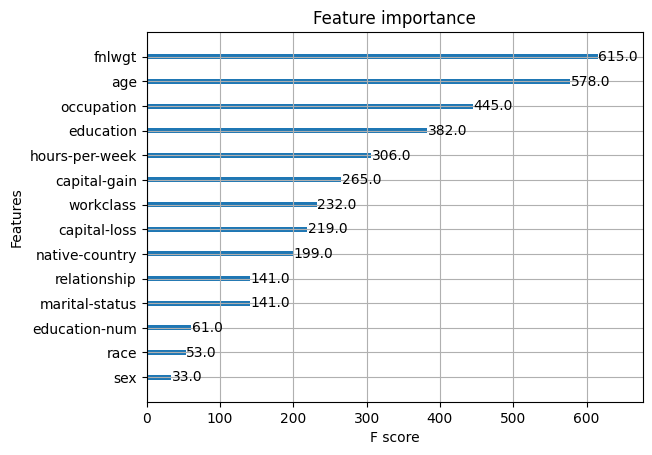

In [174]:
xgb.plot_importance(xgb_model)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

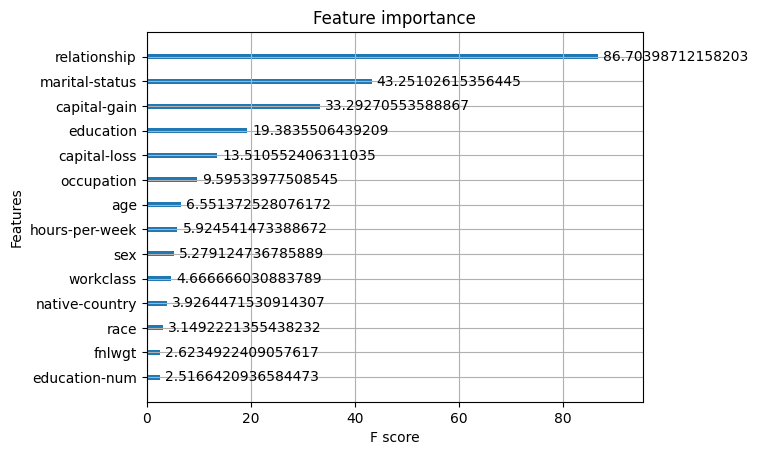

In [176]:
xgb.plot_importance(xgb_model,importance_type='gain')